# University of Michigan 
# Master of Applied Data Science
### SIAD 699: Capstone
Team: James Yoon (jamyoon), Mario Feliciano (felicma), and James Tuccori (jtuccori)

Date: April 2023
____
# Social Media Sentiment & Predicting Trading Signals 

##### In this notebook, we add financials indicatiors and basic binary increase or decreasing indicators as features. We then selected the top 87 features that were assessed as most important through the feature importance assessment we conducted.  We then run all the 87 features with 25,503 data points through pycaret to help us quickly identify the top performing models to allows to further work on in preparing models

##### Importing the data with labels

In [1]:
#from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
#import mplfinance as mpf
import numpy as np

from datetime import datetime
import time

#import tweepy
#from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from finta import TA
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Trying adding other new features

In [2]:
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']
Df_hourly_merge = pd.read_csv('assets/MergeJMJPCHourly2019202_NewsGoogleApi_ActualLabel.csv') 


In [3]:
Df_hourly_merge

,time,favorites,retweets,number_of_followers,following,followers_following_ratio,2x_retweets_+_favorites,polarity,W1 Score,hour,...,TB Base Volume WMA(l-t),TB Base Volume EMA(s-t),TB Base Volume EMA(l-t),TB Quote Volume SMA(s-t),TB Quote Volume SMA(l-t),TB Quote Volume WMA(s-t),TB Quote Volume WMA(l-t),TB Quote Volume EMA(s-t),TB Quote Volume EMA(l-t),_merge
0,2019-01-03 02:00:00,6.517857,1.276786,10592.354167,1652.068452,45.605159,9.071429,0.124241,0.264455,2.0,...,732.430679,744.775918,672.455447,3.197969e+06,3.113887e+06,3.066084e+06,2.783697e+06,2.838564e+06,2.544716e+06,both
1,2019-01-03 03:00:00,2.685230,0.479419,14341.610169,1852.799031,74.444302,3.644068,0.067950,0.097316,3.0,...,723.925800,724.568049,664.496911,2.803237e+06,3.123761e+06,2.981505e+06,2.752753e+06,2.762426e+06,2.515467e+06,both
2,2019-01-03 04:00:00,2.138107,0.670077,21769.074169,2449.731458,68.571009,3.478261,0.120056,0.144203,4.0,...,709.658698,696.062580,651.824121,2.519739e+06,3.065747e+06,2.852252e+06,2.699650e+06,2.654373e+06,2.468094e+06,both
3,2019-01-03 05:00:00,1.916462,0.670762,36958.090909,2790.968059,100.500076,3.257985,0.143717,0.110483,5.0,...,703.889003,683.398102,646.798993,2.499450e+06,2.946128e+06,2.784673e+06,2.678687e+06,2.606332e+06,2.449668e+06,both
4,2019-01-03 06:00:00,4.339394,0.921212,13345.724242,3208.639394,66.105667,6.181818,0.136780,0.199699,6.0,...,694.475837,665.145063,638.619804,2.464777e+06,2.911928e+06,2.686795e+06,2.643774e+06,2.536994e+06,2.419206e+06,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,2021-11-30 19:00:00,5.783333,0.659524,12129.000000,1975.276190,108.150291,7.102381,0.077630,0.078660,19.0,...,1022.035397,1100.978122,981.059524,7.823129e+07,6.129965e+07,6.766138e+07,5.883097e+07,6.333017e+07,5.608282e+07,both
25499,2021-11-30 20:00:00,3.011905,0.392857,14180.595238,1765.121429,31.755382,3.797619,0.095683,0.135134,20.0,...,1002.627650,1060.810611,964.418350,7.756114e+07,6.094207e+07,6.538468e+07,5.772093e+07,6.101743e+07,5.513648e+07,both
25500,2021-11-30 21:00:00,14.400000,2.407143,16161.992857,2084.061905,182.260151,19.214286,0.082271,0.107210,21.0,...,992.435214,1037.761980,955.820515,7.738122e+07,6.094384e+07,6.415113e+07,5.713233e+07,5.967983e+07,5.464741e+07,both
25501,2021-11-30 22:00:00,21.570806,3.270153,11254.296296,1814.954248,428.484448,28.111111,0.070485,0.165014,22.0,...,968.443181,993.208202,935.601025,7.355144e+07,5.893786e+07,6.137911e+07,5.575218e+07,5.711215e+07,5.349283e+07,both


In [4]:
Df_hourly_merge.columns.values

array(['time', 'favorites', 'retweets', 'number_of_followers',
       'following', 'followers_following_ratio',
       '2x_retweets_+_favorites', 'polarity', 'W1 Score', 'hour',
       'Bull_ratio', 'W Score With Bull Ratio', 'Open Time', 'Open',
       'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume',
       'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore',
       '3MovingAverage', '5MovingAverage', 'JMJ_3HMoving_averages',
       'JMJ_5HMoving_averages', 'Signal', 'Position', 'Signal35JMJ',
       'Position35JMJ', 'Actual_Label', 'Bitcoin_Google_Trend_Score',
       'BTC_Google_Trend_Score', 'Mkt Sentiment', 'Crypto Sentiment',
       'Historically Optimal SMA(s-t)', 'Historically Optimal SMA(l-t)',
       'Historically Optimal WMA(s-t)', 'Historically Optimal WMA(l-t)',
       'Historically Optimal EMA(s-t)', 'Historically Optimal EMA(l-t)',
       'Twitter Hourly Favorites SMA(s-t)',
       'Twitter Hourly Favorites SMA(l-t)',
       'Twitter Hourly Favorites

<AxesSubplot: >

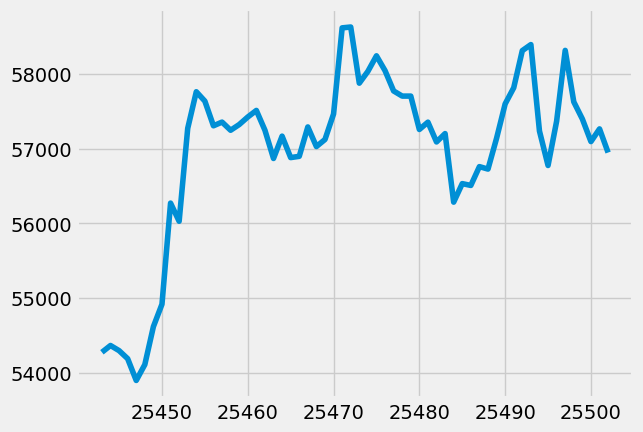

In [5]:
tmp = Df_hourly_merge.iloc[-60:]
tmp['Close'].plot()

Creating an expotential smoothing to help reduce significant variance in the close data

,Close,Open,High,Low,Volume
0,3833.470000,3835.960000,3844.990000,3825.850000,651.947136
1,3839.662593,3834.278519,3846.515926,3830.405556,711.261556
2,3836.217708,3839.406859,3848.882020,3832.642869,669.405774
3,3828.405973,3836.300790,3843.225321,3814.401266,949.818434
4,3823.259561,3828.511365,3834.511596,3813.890762,835.572735
...,...,...,...,...,...
25498,57742.212340,57950.487083,58278.468476,57244.794780,1730.662743
25499,57520.040819,57742.163979,57937.973467,57211.238673,1323.405599
25500,57245.577787,57520.023893,57839.242713,56976.433535,1407.496171
25501,57260.093725,57245.578362,57641.185950,56992.258737,962.782862


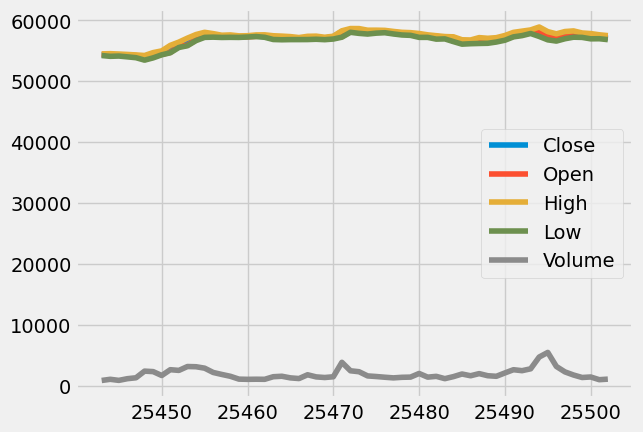

In [6]:
def _exponential_smooth(data, alpha):
    """
    Function that exponentially smooths dataset so values are less 'rigid'
    :param alpha: weight factor to weight recent values more
    """
    
    return data.ewm(alpha=alpha).mean()

Indicatordata = _exponential_smooth(Df_hourly_merge[['Close', 'Open','High','Low','Volume']], 0.65)


tmp1 = Indicatordata.iloc[-60:]
tmp1.plot()
Indicatordata

In [7]:
def _get_indicator_data(data):
    """
    Function that uses the finta API to calculate technical indicators used as the features
    :return:
    """

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Also calculate moving averages for features
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
    data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

#     # Remove columns that won't be used as features
#     del (data['open'])
#     del (data['high'])
#     del (data['low'])
#     del (data['volume'])
#     del (data['Adj Close'])
    
    return data

Indicatordatafinal = _get_indicator_data(Indicatordata)
print(Indicatordatafinal.columns)

Index(['Close', 'Open', 'High', 'Low', 'Volume', '14 period RSI', 'MACD',
       'SIGNAL', '14 period STOCH %K', 'MFV', '14 period ATR', 'MOM',
       '14 period MFI', 'ROC', 'OBV', '20 period CCI', '14 period EMV', 'VIm',
       'VIp', 'ema50', 'ema21', 'ema15', 'ema5', 'normVol'],
      dtype='object')


In [8]:
Indicatordatafinal = Indicatordatafinal.drop(['Close', 'Open', 'High', 'Low', 'Volume'], axis = 1)

In [9]:
Indicatordatafinal

,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
0,NaN,0.000000,0.000000,NaN,-1.328419e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
1,100.000000,0.138936,0.077187,NaN,-2.672006e+01,NaN,NaN,NaN,NaN,7.112616e+02,66.666667,NaN,NaN,NaN,1.000799,1.000788,1.000779,1.000734,1.039400
2,62.535849,0.070207,0.074326,NaN,-4.014038e+02,NaN,NaN,NaN,NaN,4.185578e+01,56.760056,NaN,NaN,NaN,0.999935,0.999929,0.999924,0.999901,0.986730
3,32.657509,-0.244813,-0.033783,NaN,-4.282481e+02,NaN,NaN,NaN,NaN,-9.079627e+02,-122.072855,NaN,NaN,NaN,0.998439,0.998456,0.998471,0.998551,1.240333
4,24.389910,-0.615624,-0.206868,NaN,-5.045584e+02,NaN,NaN,NaN,NaN,-1.743535e+03,-112.657835,NaN,NaN,NaN,0.997699,0.997744,0.997783,0.997985,1.064118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,55.184931,151.044209,123.643385,58.250023,4.029192e+06,927.424234,1030.308886,53.079306,2.149150,2.329512e+06,71.659238,3.023399e+07,0.925140,1.055860,1.019488,1.010926,1.007215,1.003630,0.640894
25499,52.078731,139.853089,126.885325,49.058398,4.028994e+06,927.817982,528.613610,53.894526,1.482302,2.328189e+06,42.671500,3.515644e+07,0.914098,1.085477,1.015256,1.006715,1.003116,0.999807,0.535598
25500,48.450559,107.596862,123.027633,38.133394,4.028464e+06,945.618151,-143.014237,49.643301,0.941027,2.326781e+06,11.025735,2.735127e+07,0.920503,1.060673,1.010205,1.001824,0.998441,0.995860,0.613646
25501,48.654300,82.256682,114.873443,37.990109,4.028296e+06,923.235210,-408.406483,45.374998,0.471416,2.327744e+06,2.718952,1.541033e+07,0.964061,1.060183,1.010254,1.001983,0.998781,0.996759,0.464698


Merging finacnial indicators with training data

In [10]:
Df_hourly_merge2 = pd.merge(Df_hourly_merge, Indicatordatafinal, left_index=True, right_index=True)
Df_hourly_merge2.columns

Index(['time', 'favorites', 'retweets', 'number_of_followers', 'following',
       'followers_following_ratio', '2x_retweets_+_favorites', 'polarity',
       'W1 Score', 'hour',
       ...
       'OBV', '20 period CCI', '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema21',
       'ema15', 'ema5', 'normVol'],
      dtype='object', length=146)

In [11]:
# Df_hourly_merge2 = pd.read_csv('assets/PCHourly2019202_ActualLabel.csv')

In [12]:
# Df_hourly_merge2

In [13]:
# Df_hourly_merge2.columns

In [14]:
Df_hourly_merge2 = Df_hourly_merge2.drop(['time','hour','Open Time','_merge','Signal','Position', 'Signal35JMJ', 'Position35JMJ', 'Ignore'], axis = 1)
# Df_hourly_merge2 = Df_hourly_merge2.drop(['time','hour','Open Time','_merge', 'Ignore'], axis = 1)

In [15]:
Df_hourly_merge2.columns.values

array(['favorites', 'retweets', 'number_of_followers', 'following',
       'followers_following_ratio', '2x_retweets_+_favorites', 'polarity',
       'W1 Score', 'Bull_ratio', 'W Score With Bull Ratio', 'Open',
       'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume',
       'Number of Trades', 'TB Base Volume', 'TB Quote Volume',
       '3MovingAverage', '5MovingAverage', 'JMJ_3HMoving_averages',
       'JMJ_5HMoving_averages', 'Actual_Label',
       'Bitcoin_Google_Trend_Score', 'BTC_Google_Trend_Score',
       'Mkt Sentiment', 'Crypto Sentiment',
       'Historically Optimal SMA(s-t)', 'Historically Optimal SMA(l-t)',
       'Historically Optimal WMA(s-t)', 'Historically Optimal WMA(l-t)',
       'Historically Optimal EMA(s-t)', 'Historically Optimal EMA(l-t)',
       'Twitter Hourly Favorites SMA(s-t)',
       'Twitter Hourly Favorites SMA(l-t)',
       'Twitter Hourly Favorites WMA(s-t)',
       'Twitter Hourly Favorites WMA(l-t)',
       'Twitter Hourly Favorites EMA(s-t)',


In [16]:
Df_hourly_merge2

,favorites,retweets,number_of_followers,following,followers_following_ratio,2x_retweets_+_favorites,polarity,W1 Score,Bull_ratio,W Score With Bull Ratio,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
0,6.517857,1.276786,10592.354167,1652.068452,45.605159,9.071429,0.124241,0.264455,3.275000,0.866089,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
1,2.685230,0.479419,14341.610169,1852.799031,74.444302,3.644068,0.067950,0.097316,3.342105,0.325240,...,7.112616e+02,66.666667,NaN,NaN,NaN,1.000799,1.000788,1.000779,1.000734,1.039400
2,2.138107,0.670077,21769.074169,2449.731458,68.571009,3.478261,0.120056,0.144203,6.120000,0.882520,...,4.185578e+01,56.760056,NaN,NaN,NaN,0.999935,0.999929,0.999924,0.999901,0.986730
3,1.916462,0.670762,36958.090909,2790.968059,100.500076,3.257985,0.143717,0.110483,5.964286,0.658951,...,-9.079627e+02,-122.072855,NaN,NaN,NaN,0.998439,0.998456,0.998471,0.998551,1.240333
4,4.339394,0.921212,13345.724242,3208.639394,66.105667,6.181818,0.136780,0.199699,4.607143,0.920041,...,-1.743535e+03,-112.657835,NaN,NaN,NaN,0.997699,0.997744,0.997783,0.997985,1.064118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,5.783333,0.659524,12129.000000,1975.276190,108.150291,7.102381,0.077630,0.078660,3.022222,0.237728,...,2.329512e+06,71.659238,3.023399e+07,0.925140,1.055860,1.019488,1.010926,1.007215,1.003630,0.640894
25499,3.011905,0.392857,14180.595238,1765.121429,31.755382,3.797619,0.095683,0.135134,4.277778,0.578073,...,2.328189e+06,42.671500,3.515644e+07,0.914098,1.085477,1.015256,1.006715,1.003116,0.999807,0.535598
25500,14.400000,2.407143,16161.992857,2084.061905,182.260151,19.214286,0.082271,0.107210,3.648649,0.391172,...,2.326781e+06,11.025735,2.735127e+07,0.920503,1.060673,1.010205,1.001824,0.998441,0.995860,0.613646
25501,21.570806,3.270153,11254.296296,1814.954248,428.484448,28.111111,0.070485,0.165014,1.887324,0.311435,...,2.327744e+06,2.718952,1.541033e+07,0.964061,1.060183,1.010254,1.001983,0.998781,0.996759,0.464698


## BINARY ADDITIONS

Creating binary indicators of the columns and financial features to use as new features. 

In [18]:
def binary(value):
    if value > 0:
        return 1
    else:
        return 0

In [19]:
columns = ['favorites', 'retweets', 'number_of_followers', 'following',
       'followers_following_ratio', '2x_retweets_+_favorites', 'polarity',
       'W1 Score', 'Bull_ratio', 'W Score With Bull Ratio', 'Open', 'High',
       'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades',
       'TB Base Volume', 'TB Quote Volume', '3MovingAverage', '5MovingAverage',
       'JMJ_3HMoving_averages', 'JMJ_5HMoving_averages', 
       '14 period RSI', 'MACD', 'SIGNAL', '14 period STOCH %K', 'MFV',
       '14 period ATR', 'MOM', '14 period MFI', 'ROC', 'OBV', '20 period CCI',
       '14 period EMV', 'VIm', 'VIp', 'ema50', 'ema21', 'ema15', 'ema5','normVol']

for column in columns: 
    Df_hourly_merge2['Binary{}'.format(column)]  = (Df_hourly_merge2[column] - Df_hourly_merge2[column].shift(1)).apply(binary)
 

In [20]:
# test = Df_hourly_merge2[['Close', 'BinaryClose','Actual_Label', 'following','Binaryfollowing']].head(50)
# test['dude'] = test['Close'].shift(1)
# test['dude2'] = test['Close'].shift(0)
# test['dude3'] =test['dude2'] - test['dude']
# test['dude4'] =(test['dude2'] - test['dude'] ).apply(binary)
# test

In [21]:

Df_hourly_merge2

,favorites,retweets,number_of_followers,following,followers_following_ratio,2x_retweets_+_favorites,polarity,W1 Score,Bull_ratio,W Score With Bull Ratio,...,BinaryOBV,Binary20 period CCI,Binary14 period EMV,BinaryVIm,BinaryVIp,Binaryema50,Binaryema21,Binaryema15,Binaryema5,BinarynormVol
0,6.517857,1.276786,10592.354167,1652.068452,45.605159,9.071429,0.124241,0.264455,3.275000,0.866089,...,0,0,0,0,0,0,0,0,0,0
1,2.685230,0.479419,14341.610169,1852.799031,74.444302,3.644068,0.067950,0.097316,3.342105,0.325240,...,0,0,0,0,0,1,1,1,1,1
2,2.138107,0.670077,21769.074169,2449.731458,68.571009,3.478261,0.120056,0.144203,6.120000,0.882520,...,0,0,0,0,0,0,0,0,0,0
3,1.916462,0.670762,36958.090909,2790.968059,100.500076,3.257985,0.143717,0.110483,5.964286,0.658951,...,0,0,0,0,0,0,0,0,0,1
4,4.339394,0.921212,13345.724242,3208.639394,66.105667,6.181818,0.136780,0.199699,4.607143,0.920041,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,5.783333,0.659524,12129.000000,1975.276190,108.150291,7.102381,0.077630,0.078660,3.022222,0.237728,...,0,1,1,0,1,0,0,0,0,0
25499,3.011905,0.392857,14180.595238,1765.121429,31.755382,3.797619,0.095683,0.135134,4.277778,0.578073,...,0,0,1,0,1,0,0,0,0,0
25500,14.400000,2.407143,16161.992857,2084.061905,182.260151,19.214286,0.082271,0.107210,3.648649,0.391172,...,0,0,0,1,0,0,0,0,0,1
25501,21.570806,3.270153,11254.296296,1814.954248,428.484448,28.111111,0.070485,0.165014,1.887324,0.311435,...,1,0,0,1,0,1,1,1,1,0


In [23]:
Df_hourly_merge2.columns.values

array(['favorites', 'retweets', 'number_of_followers', 'following',
       'followers_following_ratio', '2x_retweets_+_favorites', 'polarity',
       'W1 Score', 'Bull_ratio', 'W Score With Bull Ratio', 'Open',
       'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume',
       'Number of Trades', 'TB Base Volume', 'TB Quote Volume',
       '3MovingAverage', '5MovingAverage', 'JMJ_3HMoving_averages',
       'JMJ_5HMoving_averages', 'Actual_Label',
       'Bitcoin_Google_Trend_Score', 'BTC_Google_Trend_Score',
       'Mkt Sentiment', 'Crypto Sentiment',
       'Historically Optimal SMA(s-t)', 'Historically Optimal SMA(l-t)',
       'Historically Optimal WMA(s-t)', 'Historically Optimal WMA(l-t)',
       'Historically Optimal EMA(s-t)', 'Historically Optimal EMA(l-t)',
       'Twitter Hourly Favorites SMA(s-t)',
       'Twitter Hourly Favorites SMA(l-t)',
       'Twitter Hourly Favorites WMA(s-t)',
       'Twitter Hourly Favorites WMA(l-t)',
       'Twitter Hourly Favorites EMA(s-t)',


In [24]:
Df_hourly_merge2 = Df_hourly_merge2[[
'# of Hourly Trades SMA(l-t)',
'# of Hourly Trades SMA(s-t)',
'# of Hourly Trades WMA(l-t)',
'14 period MFI',
'14 period STOCH %K',
'20 period CCI',
'2x_retweets_+_favorites',
'3MovingAverage',
'BinaryJMJ_3HMoving_averages',
'BinaryJMJ_5HMoving_averages',
'BinaryMFV',
'BinaryOpen',
'BinaryQuote Asset Volume',
'BinaryVolume',
'Bitcoin_Google_Trend_Score',
'BTC_Google_Trend_Score',
'Bull_ratio',
'ema5',
'ema50',
'favorites',
'followers_following_ratio',
'following',
'Historically Optimal EMA(l-t)',
'Historically Optimal SMA(s-t)',
'Historically Optimal WMA(s-t)',
'MFV',
'Mkt Sentiment',
'normVol',
'Number of Trades',
'OBV',
'polarity',
'Quote Asset Volume',
'Quote Asset Volume SMA(l-t)',
'Quote Asset Volume SMA(s-t)',
'retweets',
'ROC',
'TB Base Volume',
'TB Base Volume EMA(l-t)',
'TB Base Volume EMA(s-t)',
'TB Base Volume SMA(l-t)',
'TB Base Volume WMA(l-t)',
'TB Base Volume WMA(s-t)',
'TB Quote Volume',
'TB Quote Volume WMA(s-t)',
'Twitter Hourly 2x Retweets + Favorites EMA(s-t)',
'Twitter Hourly 2x Retweets + Favorites SMA(s-t)',
'Twitter Hourly Bull Ratio EMA(s-t)',
'Twitter Hourly Bull Ratio SMA(l-t)',
'Twitter Hourly Bull Ratio SMA(s-t)',
'Twitter Hourly Bull Ratio WMA(l-t)',
'Twitter Hourly Bull Ratio WMA(s-t)',
'Twitter Hourly Favorites EMA(s-t)',
'Twitter Hourly Favorites WMA(l-t)',
'Twitter Hourly Favorites WMA(s-t)',
'Twitter Hourly Follower Exposure EMA(l-t)',
'Twitter Hourly Follower Exposure EMA(s-t)',
'Twitter Hourly Follower Exposure SMA(s-t)',
'Twitter Hourly Follower Exposure WMA(l-t)' ,
'Twitter Hourly Follower Exposure WMA(s-t)',
'Twitter Hourly Following Exposure EMA(l-t)',
'Twitter Hourly Following Exposure SMA(s-t)',
'Twitter Hourly Following Exposure WMA(s-t)',
'Twitter Hourly Polarity Score EMA(l-t)',
'Twitter Hourly Polarity Score EMA(s-t)',
'Twitter Hourly Polarity Score SMA(l-t)',
'Twitter Hourly Polarity Score SMA(s-t)',
'Twitter Hourly Polarity Score WMA(l-t)',
'Twitter Hourly Polarity Score WMA(s-t)',
'Twitter Hourly Retweets EMA(l-t)',
'Twitter Hourly Retweets SMA(l-t)',
'Twitter Hourly Retweets SMA(s-t)',
'Twitter Hourly Retweets WMA(s-t)',
'Twitter Hourly Weighted Bull Ratio EMA(l-t)',
'Twitter Hourly Weighted Bull Ratio EMA(s-t)',
'Twitter Hourly Weighted Bull Ratio SMA(l-t)',
'Twitter Hourly Weighted Bull Ratio SMA(s-t)',
'Twitter Hourly Weighted Bull Ratio WMA(l-t)',
'Twitter Hourly Weighted Bull Ratio WMA(s-t)',
'Twitter W1 Score EMA(l-t)',
'Twitter W1 Score EMA(s-t)',
'Twitter W1 Score SMA(l-t)',
'Twitter W1 Score SMA(s-t)',
'Twitter W1 Score WMA(l-t)',
'Twitter W1 Score WMA(s-t)',
'VIm',
'Volume',
'W1 Score',
'Actual_Label']]


In [25]:
len(Df_hourly_merge2.columns)

88

In [26]:
Df_hourly_merge2

,# of Hourly Trades SMA(l-t),# of Hourly Trades SMA(s-t),# of Hourly Trades WMA(l-t),14 period MFI,14 period STOCH %K,20 period CCI,2x_retweets_+_favorites,3MovingAverage,BinaryJMJ_3HMoving_averages,BinaryJMJ_5HMoving_averages,...,Twitter W1 Score EMA(l-t),Twitter W1 Score EMA(s-t),Twitter W1 Score SMA(l-t),Twitter W1 Score SMA(s-t),Twitter W1 Score WMA(l-t),Twitter W1 Score WMA(s-t),VIm,Volume,W1 Score,Actual_Label
0,9817.952381,9893.000000,8855.707755,NaN,NaN,NaN,9.071429,3841.766667,0,0,...,0.135012,0.148529,0.138148,0.193676,0.124304,0.162161,NaN,651.947136,0.264455,1.0
1,9772.047619,9187.000000,8772.238367,NaN,NaN,66.666667,3.644068,3833.403333,1,0,...,0.133712,0.145115,0.140709,0.190524,0.124006,0.160750,NaN,732.021603,0.097316,0.0
2,9631.714286,8814.727273,8726.655510,NaN,NaN,56.760056,3.478261,3837.086667,0,0,...,0.134074,0.145054,0.142410,0.188199,0.125651,0.162292,NaN,649.628917,0.144203,0.0
3,9341.238095,8855.000000,8746.358367,NaN,NaN,-122.072855,3.257985,3836.630000,0,0,...,0.133261,0.142749,0.146707,0.192741,0.125909,0.160724,NaN,1094.336108,0.110483,0.0
4,9224.000000,8726.818182,8668.191837,NaN,NaN,-112.657835,6.181818,3833.600000,0,0,...,0.135552,0.146546,0.154514,0.193507,0.129679,0.166031,NaN,774.978958,0.199699,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25498,69718.761905,84536.545455,67611.409796,53.079306,58.250023,71.659238,7.102381,57489.413333,1,0,...,0.155910,0.156923,0.158734,0.143910,0.160721,0.155244,0.925140,1454.499780,0.078660,0.0
25499,69809.571429,83459.000000,66804.516735,53.894526,49.058398,42.671500,3.797619,57773.616667,0,1,...,0.155194,0.155470,0.155921,0.148941,0.159539,0.153861,0.914098,1104.113290,0.135134,0.0
25500,69614.904762,83495.818182,66137.515102,49.643301,38.133394,11.025735,19.214286,57783.440000,0,1,...,0.153539,0.152253,0.153626,0.148890,0.157403,0.150181,0.920503,1452.775710,0.107210,1.0
25501,68090.857143,79858.181818,64948.639184,45.374998,37.990109,2.718952,28.111111,57376.063333,0,0,...,0.153935,0.153104,0.154047,0.153549,0.157550,0.151032,0.964061,723.321850,0.165014,0.0


In [27]:
Df_hourly_merge2.describe()

,# of Hourly Trades SMA(l-t),# of Hourly Trades SMA(s-t),# of Hourly Trades WMA(l-t),14 period MFI,14 period STOCH %K,20 period CCI,2x_retweets_+_favorites,3MovingAverage,BinaryJMJ_3HMoving_averages,BinaryJMJ_5HMoving_averages,...,Twitter W1 Score EMA(l-t),Twitter W1 Score EMA(s-t),Twitter W1 Score SMA(l-t),Twitter W1 Score SMA(s-t),Twitter W1 Score WMA(l-t),Twitter W1 Score WMA(s-t),VIm,Volume,W1 Score,Actual_Label
count,25503.000000,25503.000000,25503.000000,25490.000000,25490.000000,25502.000000,25503.000000,25503.000000,25503.000000,25503.000000,...,25503.000000,25503.000000,25503.000000,25503.000000,25503.000000,25503.000000,25489.000000,25503.000000,25503.000000,25503.000000
mean,42358.181402,42375.783013,42333.273861,51.734748,54.501948,9.152814,7.940957,21161.975152,0.516135,0.523507,...,0.130128,0.130173,0.130193,0.130272,0.130151,0.130217,0.984324,2569.177180,0.130060,0.512763
std,33002.978089,34263.008095,32164.292040,19.621135,26.748500,118.347756,10.580463,18818.688417,0.499749,0.499457,...,0.024931,0.027908,0.029689,0.036016,0.026898,0.030480,0.145529,2402.024323,0.077627,0.499847
min,4620.904762,4295.363636,4983.686531,0.000000,1.132991,-537.741045,0.260870,3378.846667,0.000000,0.000000,...,0.066793,0.055652,0.048845,0.027705,0.061671,0.047788,0.300976,0.000000,-0.243092,0.000000
25%,16411.642857,16171.772727,16519.152245,37.538877,30.635489,-75.062143,3.047139,8088.613333,0.000000,0.000000,...,0.112562,0.110645,0.109201,0.104784,0.111045,0.108862,0.895157,1202.747235,0.076183,0.000000
50%,31129.238095,31021.454545,30904.441633,51.698513,56.393468,17.437645,5.006383,10376.476667,1.000000,1.000000,...,0.130177,0.129533,0.129332,0.128368,0.129620,0.129278,0.993841,1905.882808,0.120606,1.000000
75%,63907.333333,62066.954545,64844.691429,66.036787,78.991657,91.866949,9.040355,36013.525000,1.000000,1.000000,...,0.147153,0.148676,0.149226,0.152972,0.147861,0.149870,1.079235,3055.295241,0.173688,1.000000
max,285369.047619,365158.818182,234518.106939,100.000000,99.490395,565.601895,312.594298,68502.336667,1.000000,1.000000,...,0.235589,0.284870,0.319647,0.373253,0.264868,0.326369,1.580281,47255.762685,0.716862,1.000000


In [29]:
pd.set_option('display.max_info_columns', 200)

In [30]:
Df_hourly_merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25503 entries, 0 to 25502
Data columns (total 88 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   # of Hourly Trades SMA(l-t)                      25503 non-null  float64
 1   # of Hourly Trades SMA(s-t)                      25503 non-null  float64
 2   # of Hourly Trades WMA(l-t)                      25503 non-null  float64
 3   14 period MFI                                    25490 non-null  float64
 4   14 period STOCH %K                               25490 non-null  float64
 5   20 period CCI                                    25502 non-null  float64
 6   2x_retweets_+_favorites                          25503 non-null  float64
 7   3MovingAverage                                   25503 non-null  float64
 8   BinaryJMJ_3HMoving_averages                      25503 non-null  int64  
 9   BinaryJMJ_5HMoving_averages 

In [34]:
#Importing Pycaret
from pycaret.classification import *
import sklearn

#from pycaret.regression import *

## Assessing Data, Normalized

Running a pycaret assessment to help indentify the top models for us to assess in detials

In [37]:
experiment = setup(data = Df_hourly_merge2, target = 'Actual_Label', 
                   normalize = True,
                   use_gpu = True, 
                   fold_shuffle = False,
#                    data_split_shuffle = False,
                   log_experiment = True,
                   session_id = 2174)

,Description,Value
0,session_id,2174
1,Target,Actual_Label
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(25503, 88)"
5,Missing Values,True
6,Numeric Features,81
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


2023/03/22 00:00:05 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



##### Out top models are the GBC, ADA, LDA, RC, and LR models

In [38]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5571,0.5719,0.6359,0.5607,0.5959,0.1102,0.1113,28.7100
lr,Logistic Regression,0.5557,0.5737,0.6066,0.5626,0.5837,0.1088,0.1092,0.5880
lda,Linear Discriminant Analysis,0.5545,0.5734,0.6049,0.5616,0.5824,0.1064,0.1068,0.1440
ridge,Ridge Classifier,0.5542,0.0000,0.6031,0.5615,0.5814,0.1058,0.1062,0.0250
ada,Ada Boost Classifier,0.5492,0.5657,0.6023,0.5565,0.5784,0.0956,0.0960,5.6270
lightgbm,Light Gradient Boosting Machine,0.5380,0.5531,0.5900,0.5466,0.5674,0.0733,0.0736,1.8850
svm,SVM - Linear Kernel,0.5323,0.0000,0.5407,0.5475,0.5389,0.0640,0.0650,0.2260
et,Extra Trees Classifier,0.5283,0.5327,0.5526,0.5398,0.5460,0.0553,0.0553,1.4930
nb,Naive Bayes,0.5239,0.5334,0.5082,0.5396,0.5209,0.0486,0.0492,0.0270
rf,Random Forest Classifier,0.5220,0.5299,0.5574,0.5331,0.5449,0.0420,0.0421,1.7790


##### Evaluating the best model

In [39]:
predict_model (best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.5529,0.5736,0.6285,0.5551,0.5896,0.1027,0.1036


,# of Hourly Trades SMA(l-t),# of Hourly Trades SMA(s-t),# of Hourly Trades WMA(l-t),14 period MFI,14 period STOCH %K,20 period CCI,2x_retweets_+_favorites,Bitcoin_Google_Trend_Score,BTC_Google_Trend_Score,Bull_ratio,...,W1 Score,BinaryJMJ_3HMoving_averages_0,BinaryJMJ_5HMoving_averages_1,BinaryMFV_1,BinaryOpen_1,BinaryQuote Asset Volume_1,BinaryVolume_0,Actual_Label,Label,Score
0,2.364213,1.659639,1.876923,1.244890,0.619926,0.648095,0.119318,-0.280624,-0.760460,-0.537659,...,1.177008,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.5565
1,0.124772,0.295098,0.315433,1.121472,-0.081405,0.657275,0.462981,-1.201596,-1.111671,1.880052,...,-0.231370,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5721
2,-0.811435,-0.738376,-0.817473,0.564096,0.138351,0.346729,-0.513577,0.423648,-0.292178,-1.178866,...,-1.851834,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5284
3,-0.706201,-0.786019,-0.680410,-0.737320,-1.660322,-1.558133,-0.203584,-0.334799,-0.292178,-0.709878,...,0.104232,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.5988
4,0.178626,0.324906,0.044689,-1.716358,-1.690205,-1.071752,-0.474119,0.802872,0.176104,-0.571380,...,-0.284478,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.6307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,-0.115306,-0.133361,-0.200623,1.368035,1.030081,0.756287,-0.063015,-0.822372,-0.877530,2.012893,...,-0.785978,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.5375
7647,-1.100080,-1.081247,-1.125412,0.486715,0.699821,1.103338,-0.612364,0.369473,0.644386,0.566399,...,-1.081400,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5225
7648,0.800780,0.327763,1.075145,-0.859523,0.283136,-0.128857,-0.183743,-0.388974,-0.526319,-0.391534,...,-0.264350,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.5575
7649,-0.466029,-0.527783,-0.432123,0.272590,0.190897,-0.113218,-0.341388,0.261124,0.176104,0.131441,...,-2.160719,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.5188


In [40]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

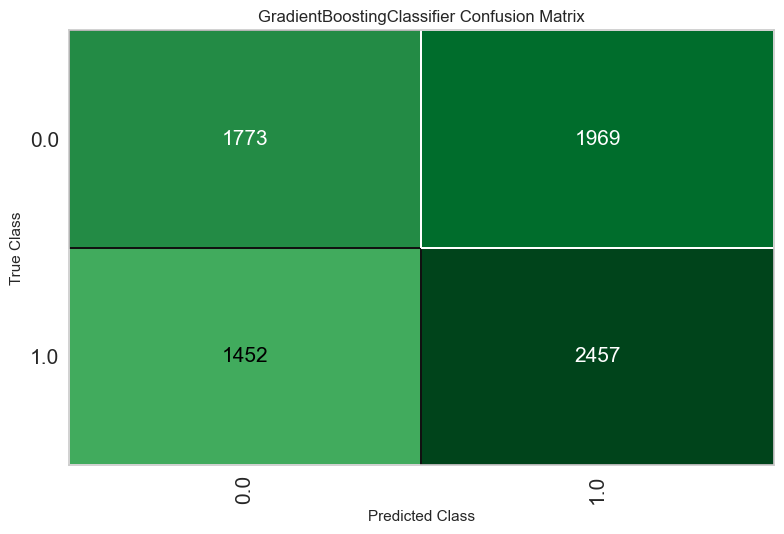

In [41]:
plot_model(best, plot = 'confusion_matrix')

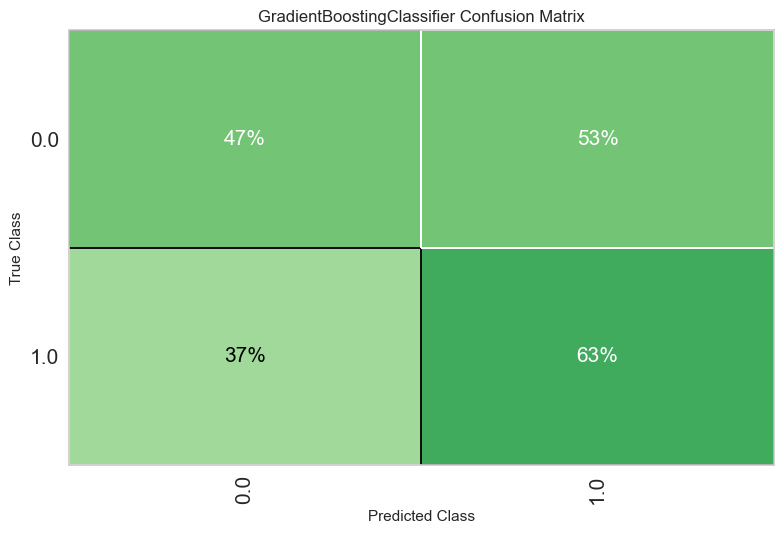

In [42]:
plot_model(best, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})

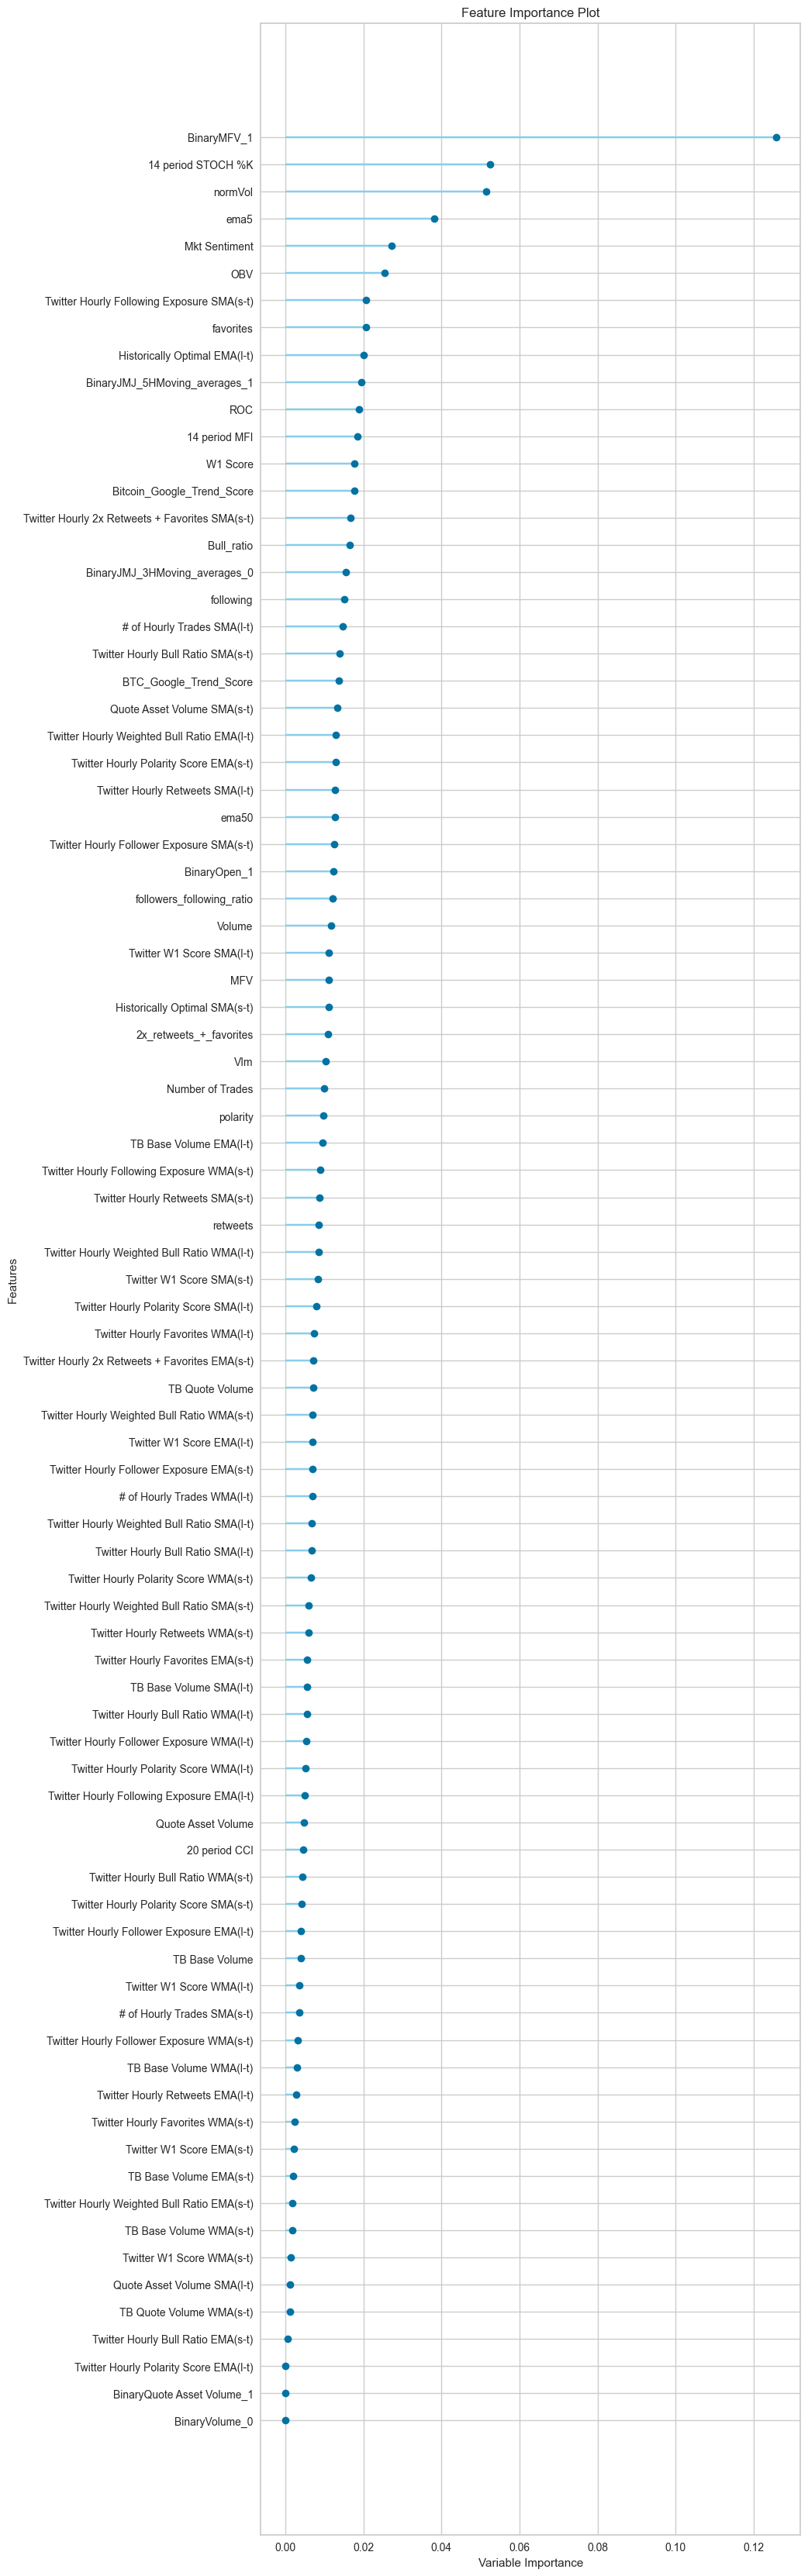

In [43]:
plot_model(best, plot = 'feature_all')

##### Further evaluation the top models in details starting with GBC below

In [46]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5599,0.5718,0.6325,0.5637,0.5961,0.1162,0.1171
1,0.5470,0.5641,0.6412,0.5506,0.5924,0.0893,0.0906
2,0.5513,0.5644,0.6288,0.5554,0.5899,0.0987,0.0996
3,0.5557,0.5669,0.6299,0.5597,0.5927,0.1078,0.1088
4,0.5535,0.5674,0.6281,0.5581,0.5911,0.1032,0.1040
5,0.5440,0.5633,0.6270,0.5492,0.5855,0.0836,0.0845
6,0.5748,0.5948,0.6554,0.5757,0.6130,0.1456,0.1471
7,0.5602,0.5740,0.6107,0.5668,0.5879,0.1179,0.1182
8,0.5585,0.5707,0.6434,0.5614,0.5996,0.1128,0.1141


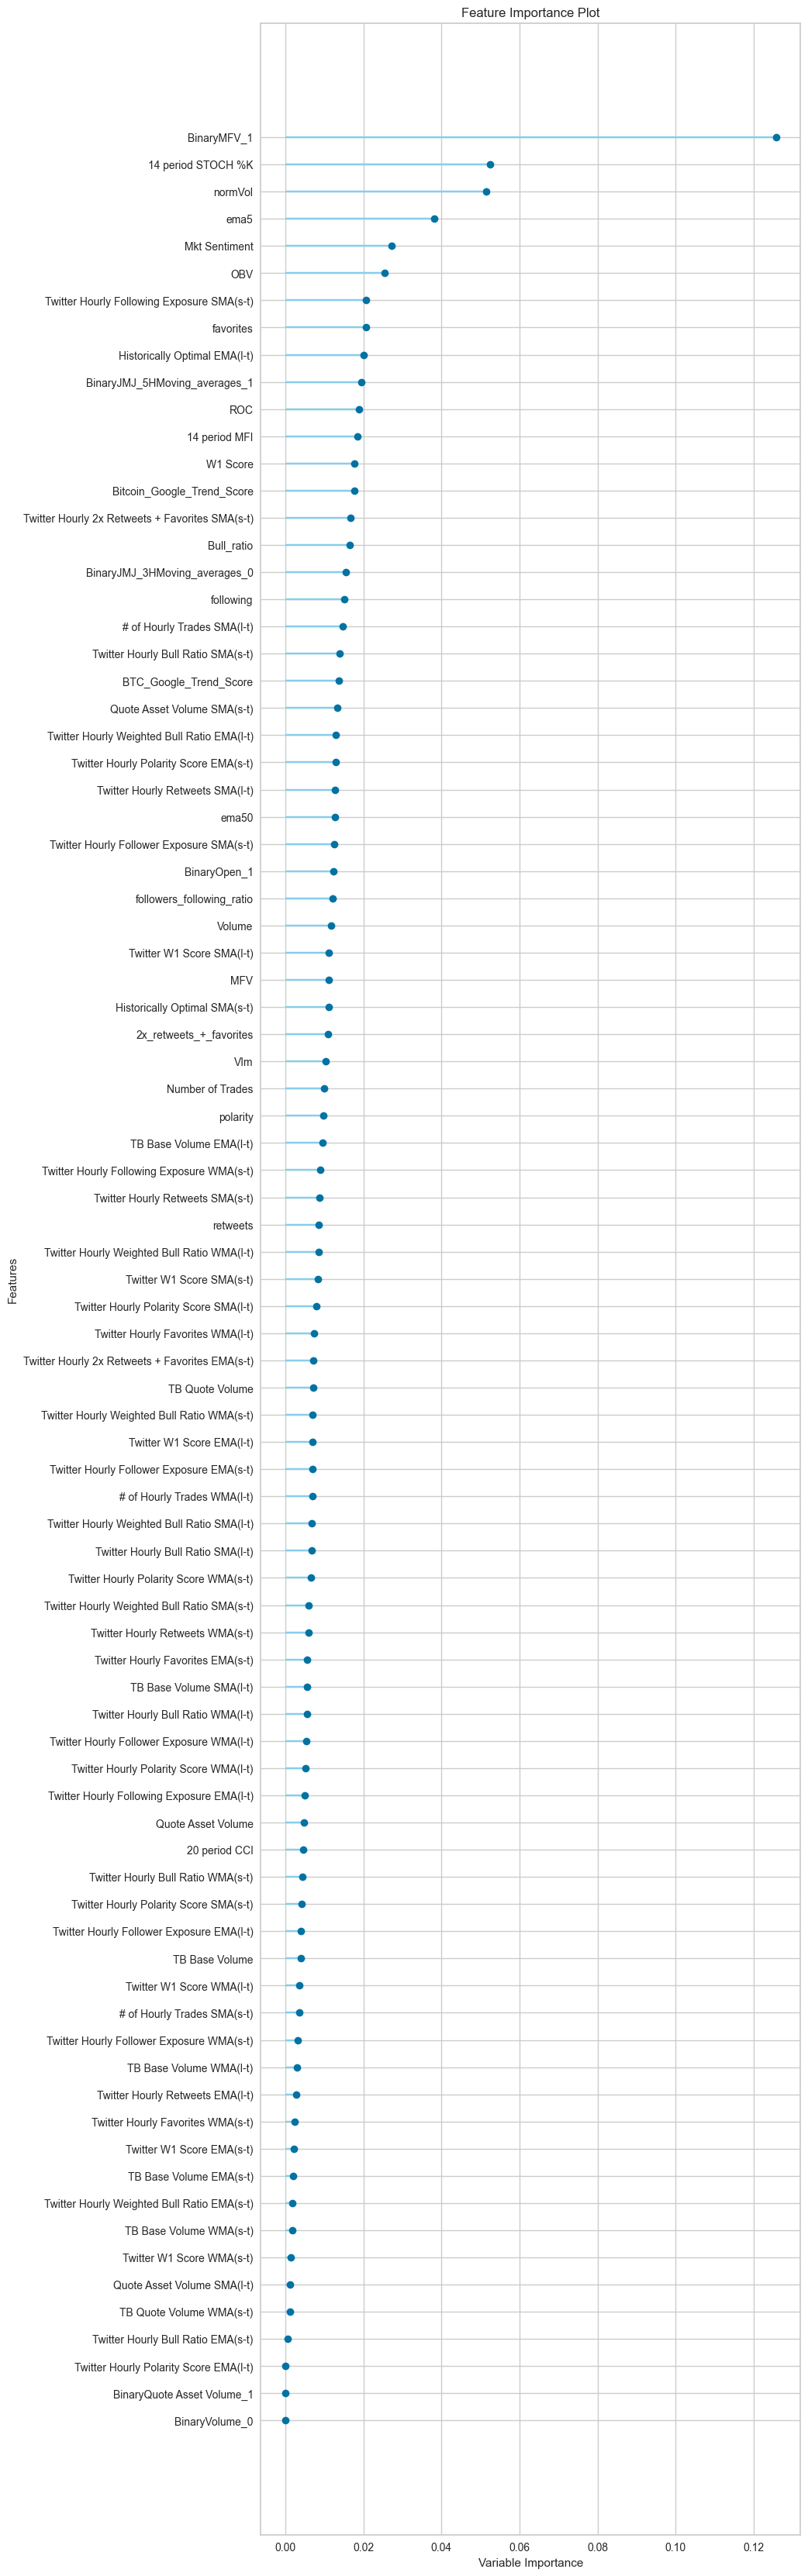

In [47]:
plot_model(gbc, plot = 'feature_all')

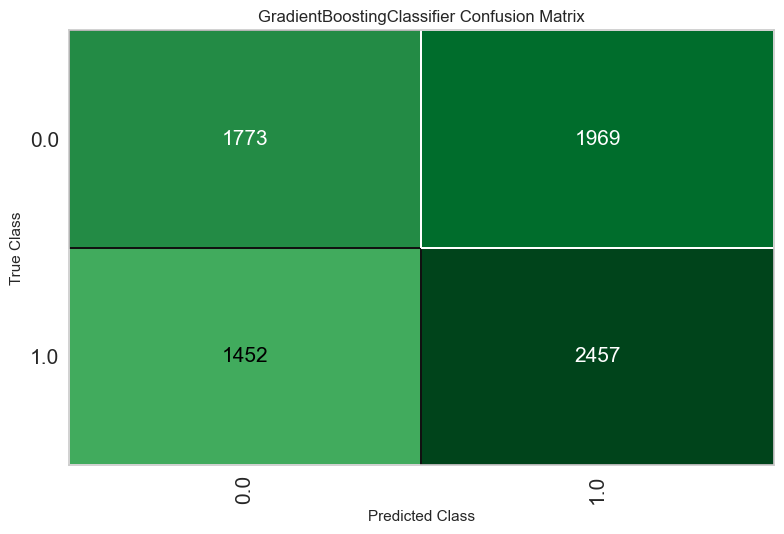

In [48]:
plot_model(gbc, plot = 'confusion_matrix')

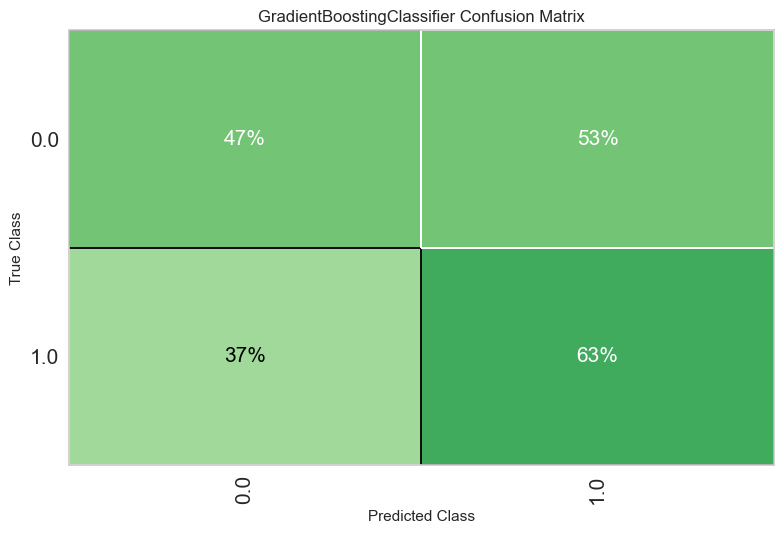

In [49]:
plot_model(gbc, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})

#### Evaluating the LR model

In [50]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5414,0.5585,0.5889,0.5499,0.5687,0.0804,0.0806
1,0.5672,0.5806,0.6467,0.5691,0.6054,0.1305,0.1318
2,0.5423,0.5660,0.6070,0.5489,0.5765,0.0813,0.0818
3,0.5479,0.5635,0.5950,0.5556,0.5746,0.0934,0.0937
4,0.5490,0.5627,0.5878,0.5580,0.5725,0.0960,0.0961
5,0.5479,0.5622,0.6118,0.5543,0.5816,0.0925,0.0930
6,0.5647,0.5908,0.6074,0.5719,0.5891,0.1272,0.1275
7,0.5720,0.5863,0.6074,0.5796,0.5932,0.1422,0.1423
8,0.5496,0.5799,0.6041,0.5568,0.5795,0.0963,0.0967


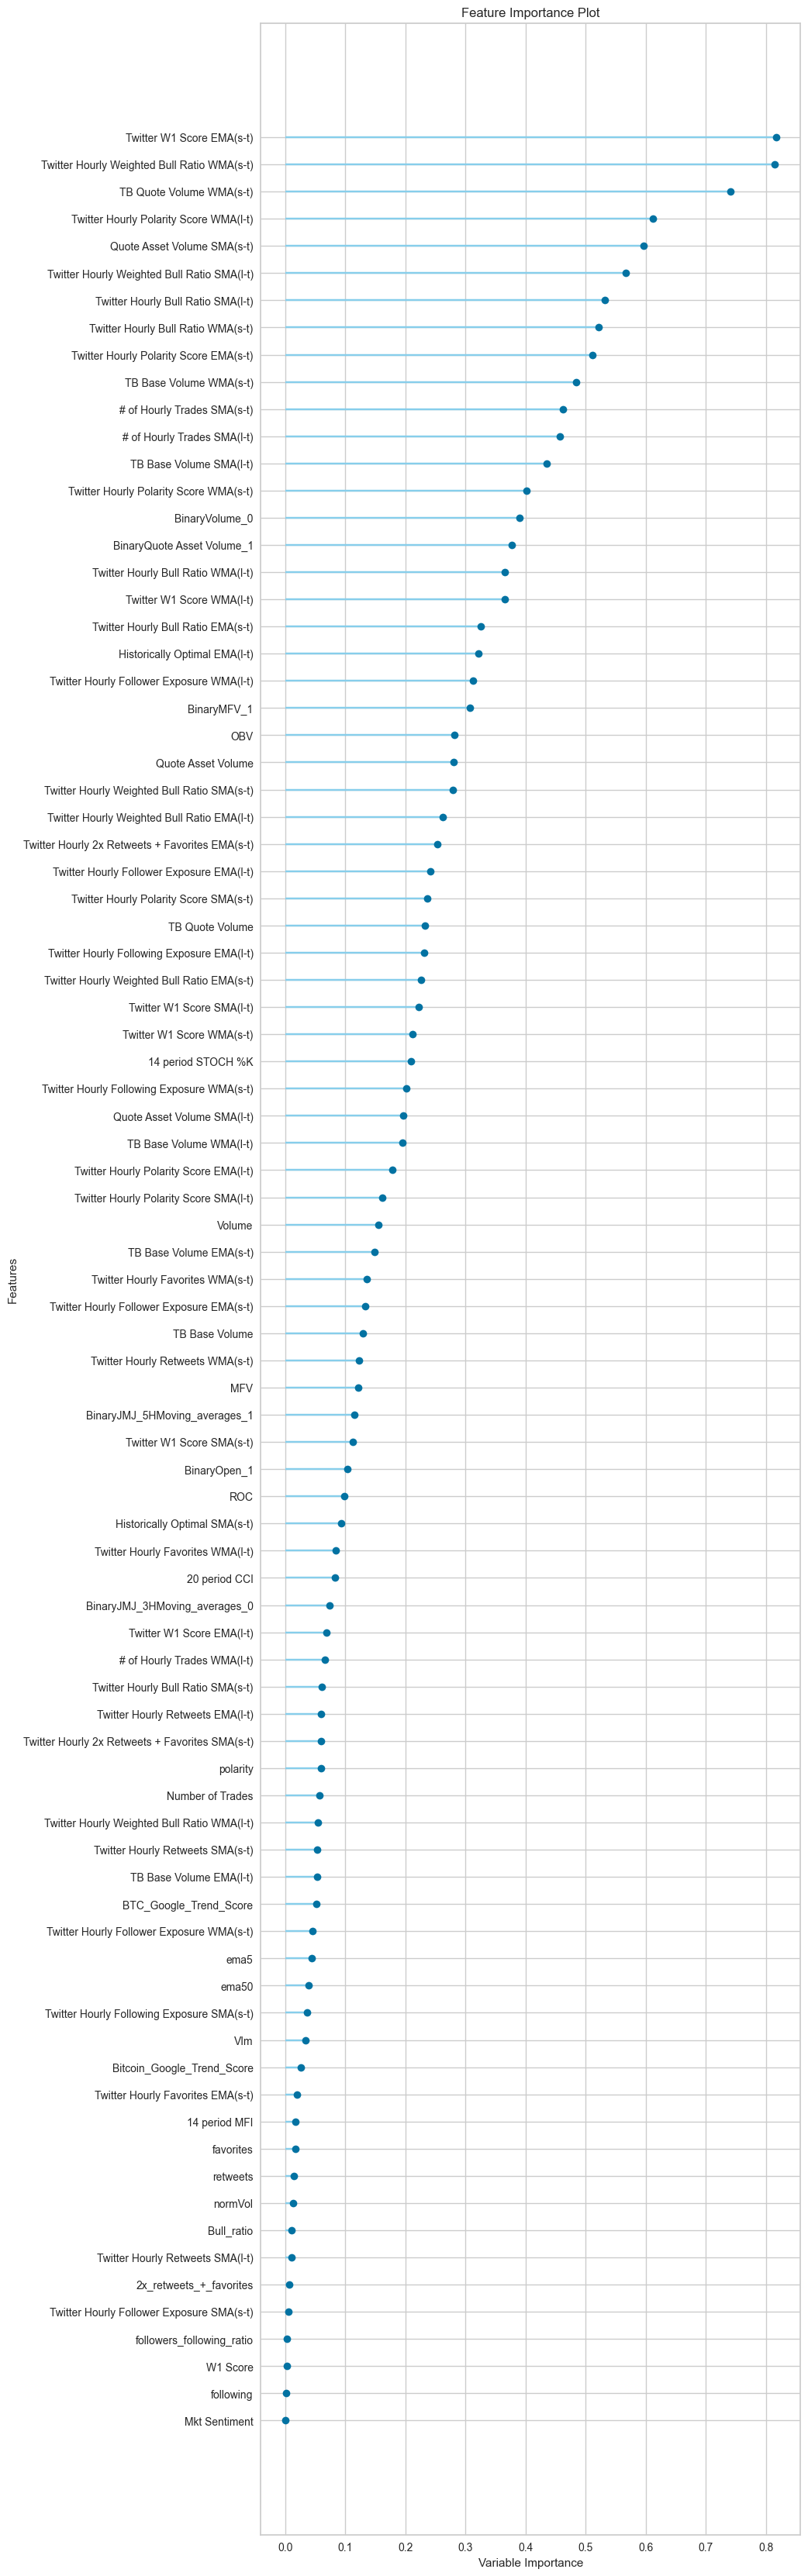

In [51]:
plot_model(lr, plot = 'feature_all')

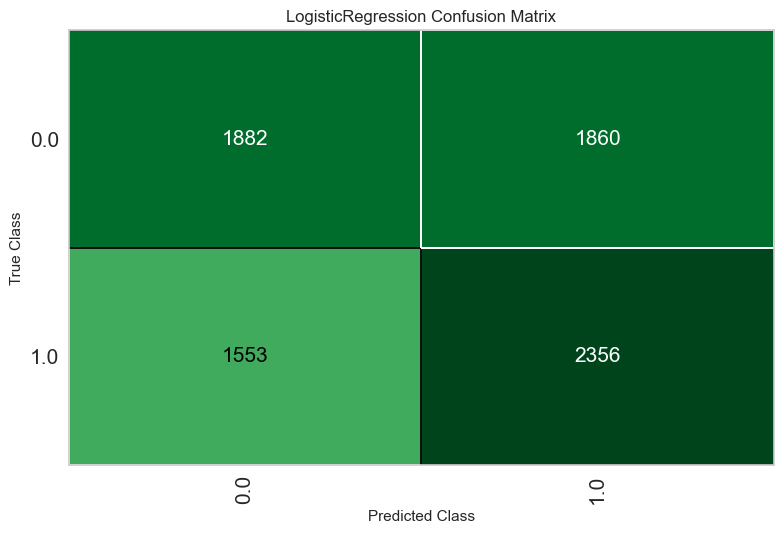

In [52]:
plot_model(lr, plot = 'confusion_matrix')

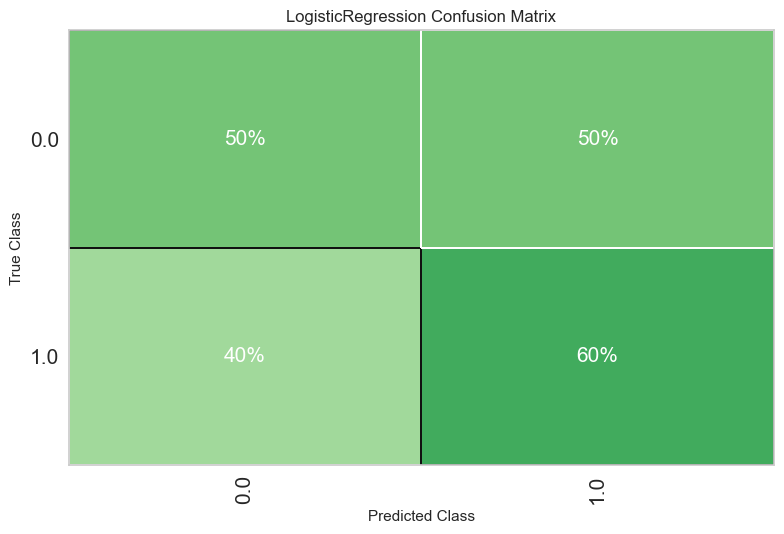

In [53]:
plot_model(lr, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})

#### Evaluating the LDA model

In [54]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5403,0.5574,0.5900,0.5487,0.5686,0.0780,0.0783
1,0.5622,0.5831,0.6390,0.5651,0.5998,0.1205,0.1216
2,0.5440,0.5656,0.6037,0.5508,0.5760,0.0849,0.0854
3,0.5451,0.5603,0.5884,0.5534,0.5704,0.0880,0.0882
4,0.5557,0.5634,0.6031,0.5631,0.5824,0.1090,0.1093
5,0.5451,0.5608,0.6063,0.5521,0.5780,0.0870,0.0874
6,0.5625,0.5904,0.6009,0.5704,0.5852,0.1229,0.1231
7,0.5709,0.5872,0.6009,0.5794,0.5899,0.1402,0.1403
8,0.5479,0.5795,0.6063,0.5549,0.5795,0.0927,0.0932


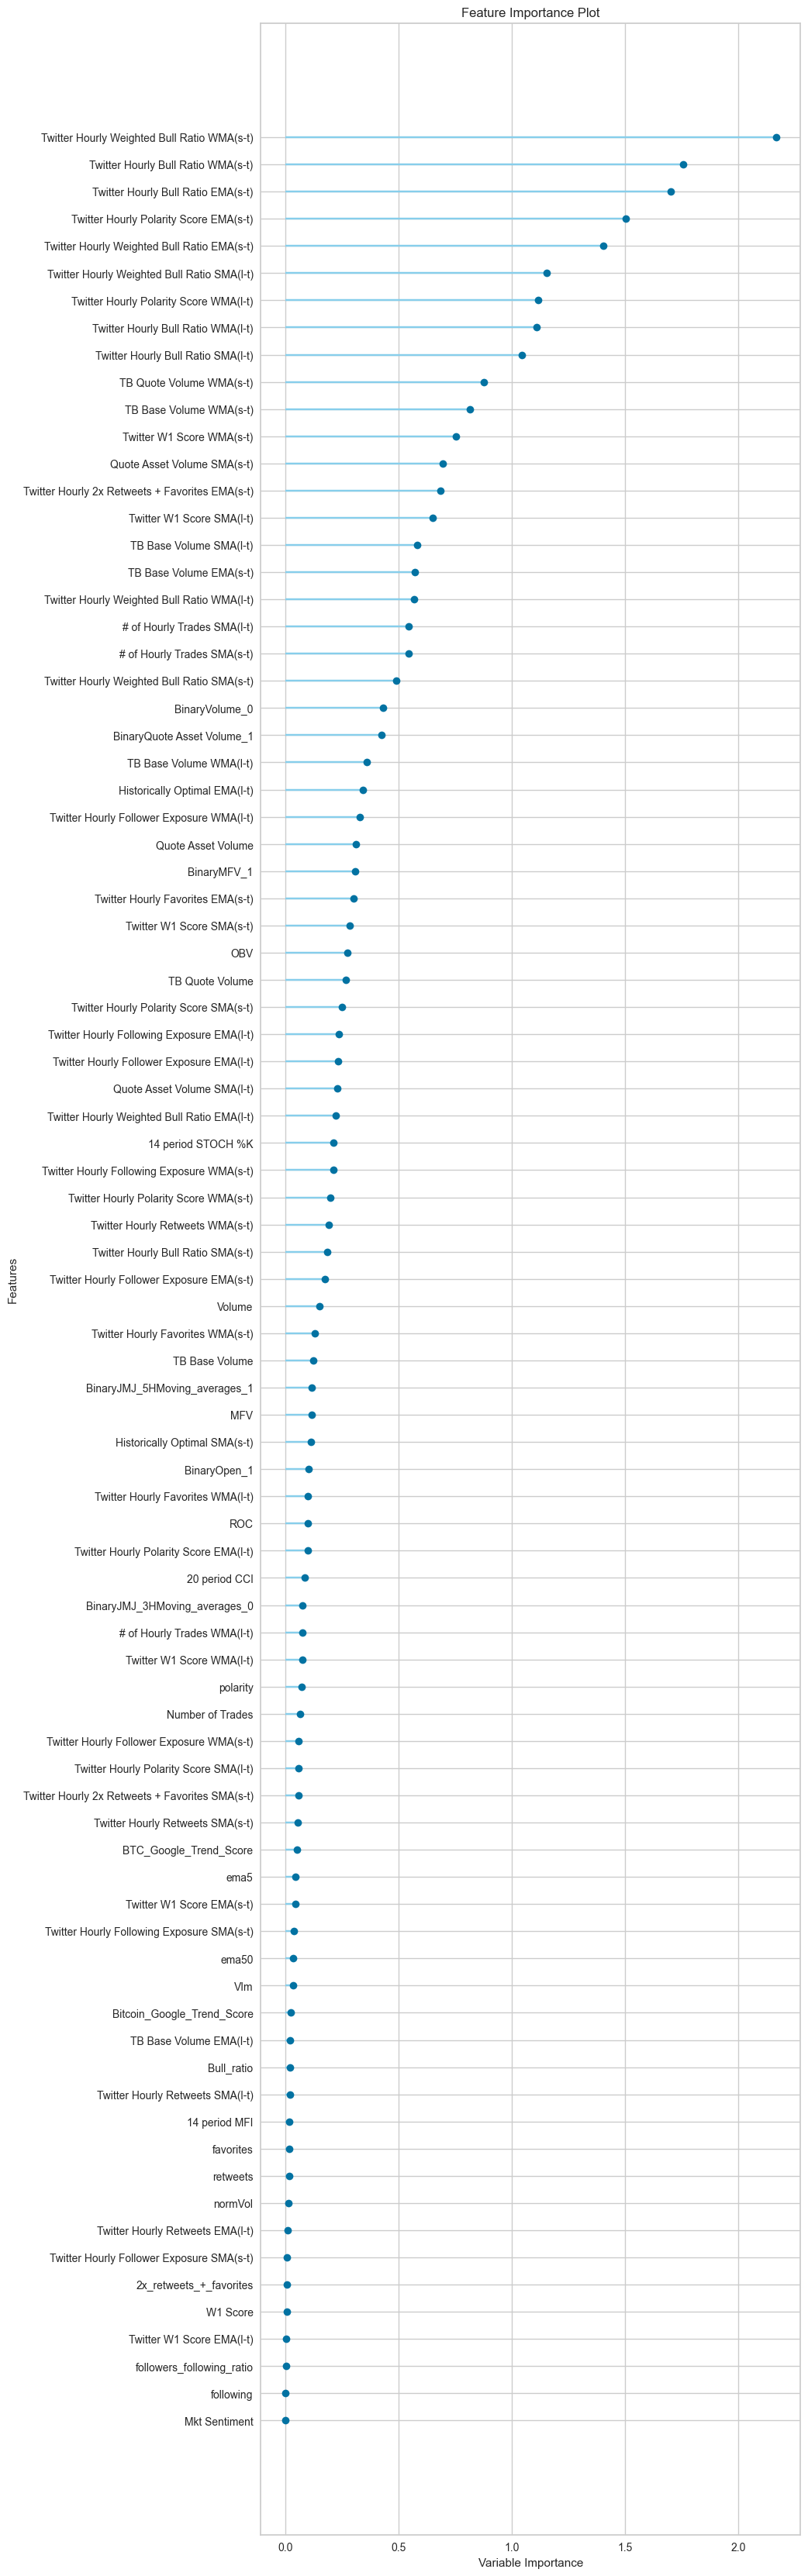

In [55]:
plot_model(lda, plot = 'feature_all')

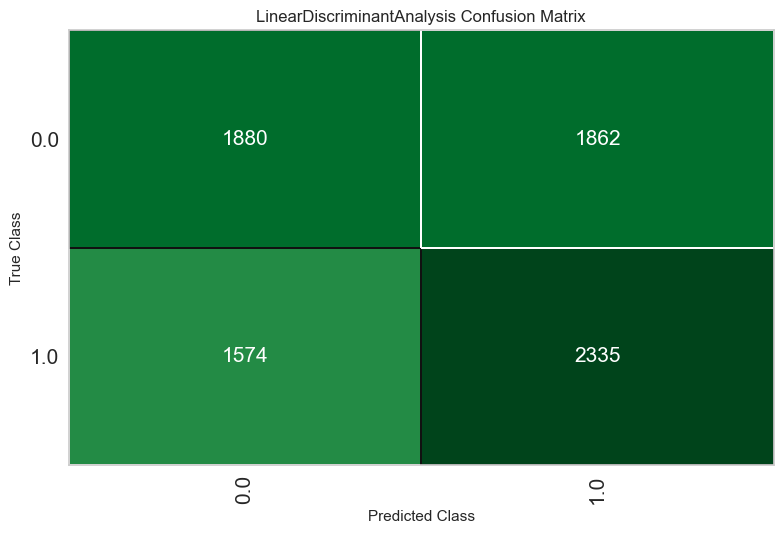

In [56]:
plot_model(lda, plot = 'confusion_matrix')

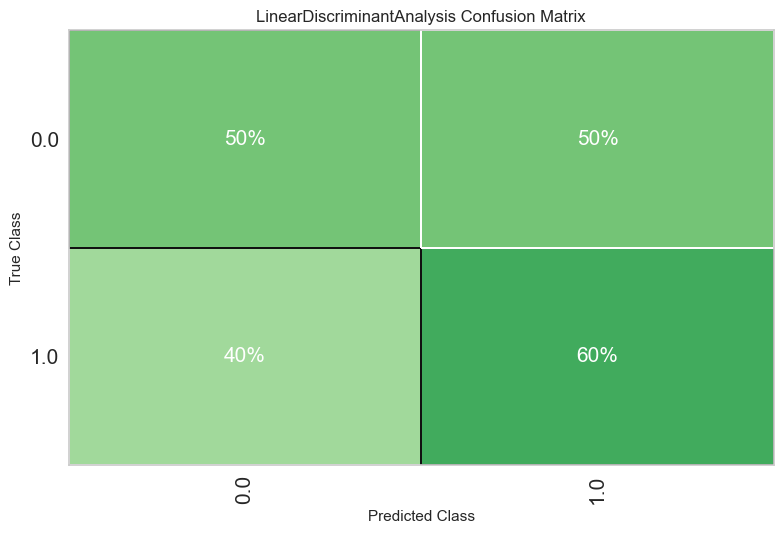

In [57]:
plot_model(lda, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})

#### Evaluating the ADA model

In [58]:
ada = create_model('ada')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5504,0.5610,0.6085,0.5569,0.5816,0.0978,0.0983
1,0.5358,0.5610,0.5889,0.5444,0.5657,0.0689,0.0691
2,0.5529,0.5659,0.6168,0.5583,0.5861,0.1027,0.1033
3,0.5429,0.5561,0.5928,0.5507,0.5710,0.0832,0.0834
4,0.5541,0.5685,0.6085,0.5608,0.5837,0.1053,0.1057
5,0.5451,0.5642,0.6281,0.5501,0.5866,0.0859,0.0868
6,0.5641,0.5860,0.6161,0.5701,0.5922,0.1256,0.1261
7,0.5445,0.5540,0.5692,0.5553,0.5622,0.0877,0.0878
8,0.5546,0.5784,0.6041,0.5619,0.5822,0.1067,0.1070


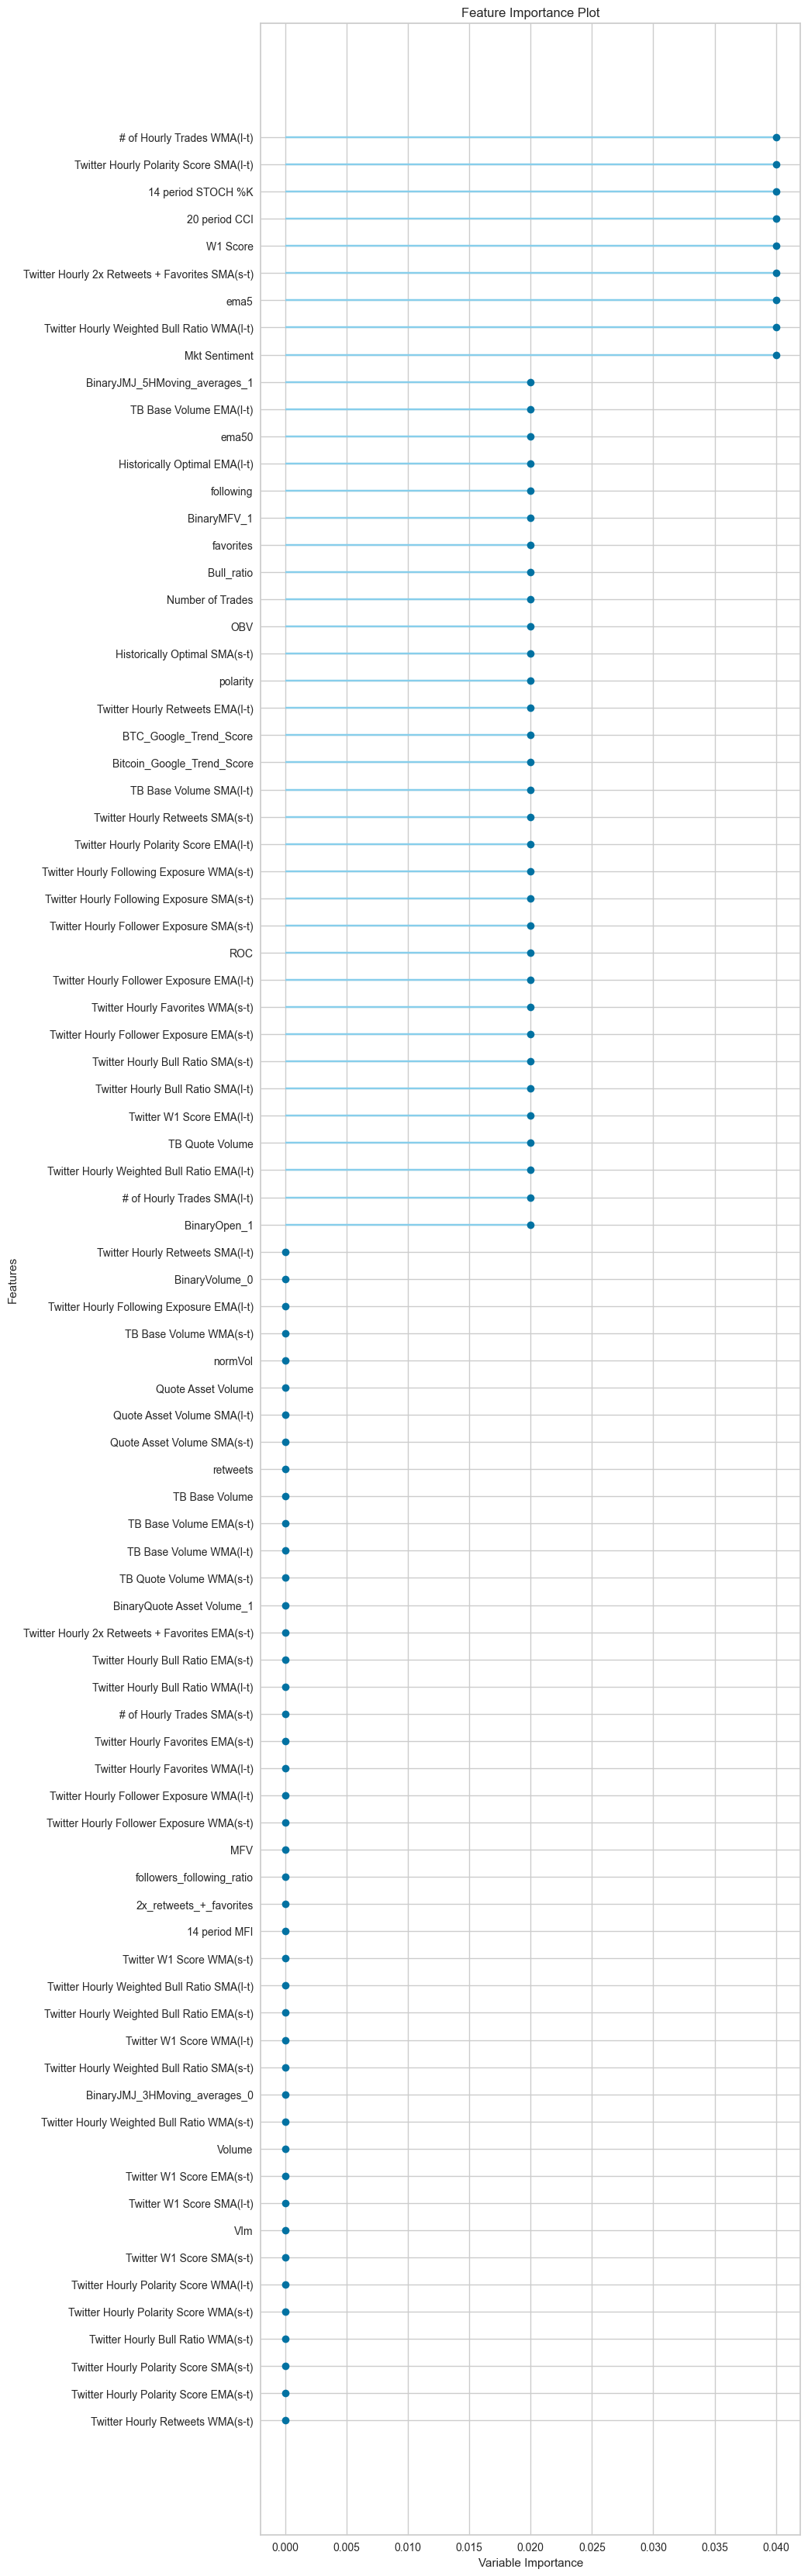

In [59]:
plot_model(ada, plot = 'feature_all')

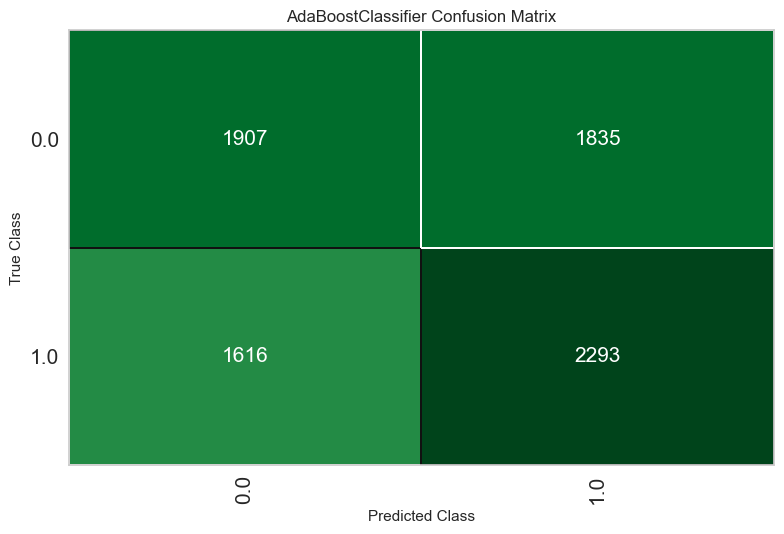

In [60]:
plot_model(ada, plot = 'confusion_matrix')

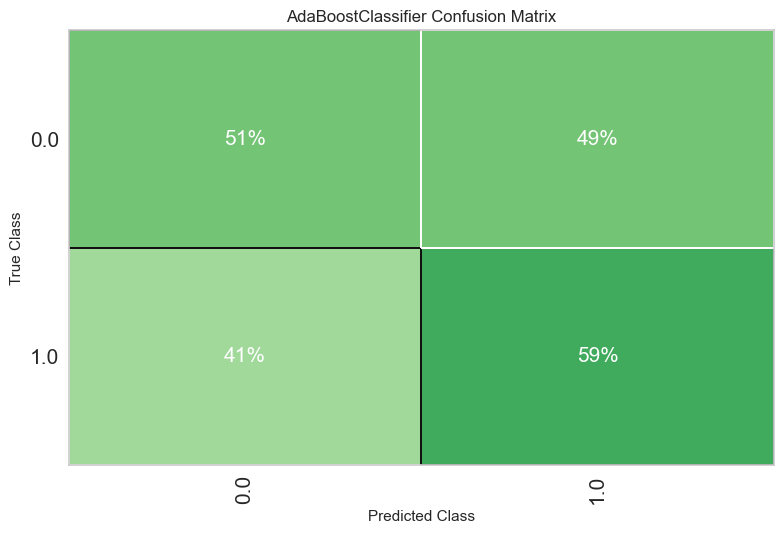

In [61]:
plot_model(ada, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})

#### Evaluating the RC model

In [62]:
rc = create_model('ridge')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5420,0.0000,0.5889,0.5505,0.5690,0.0816,0.0818
1,0.5649,0.0000,0.6434,0.5673,0.6030,0.1260,0.1273
2,0.5412,0.0000,0.6037,0.5481,0.5745,0.0792,0.0796
3,0.5451,0.0000,0.5884,0.5534,0.5704,0.0880,0.0882
4,0.5507,0.0000,0.5911,0.5593,0.5748,0.0993,0.0995
5,0.5462,0.0000,0.6085,0.5530,0.5794,0.0892,0.0897
6,0.5641,0.0000,0.6009,0.5722,0.5862,0.1264,0.1266
7,0.5709,0.0000,0.5998,0.5796,0.5895,0.1402,0.1403
8,0.5485,0.0000,0.6031,0.5558,0.5785,0.0941,0.0944


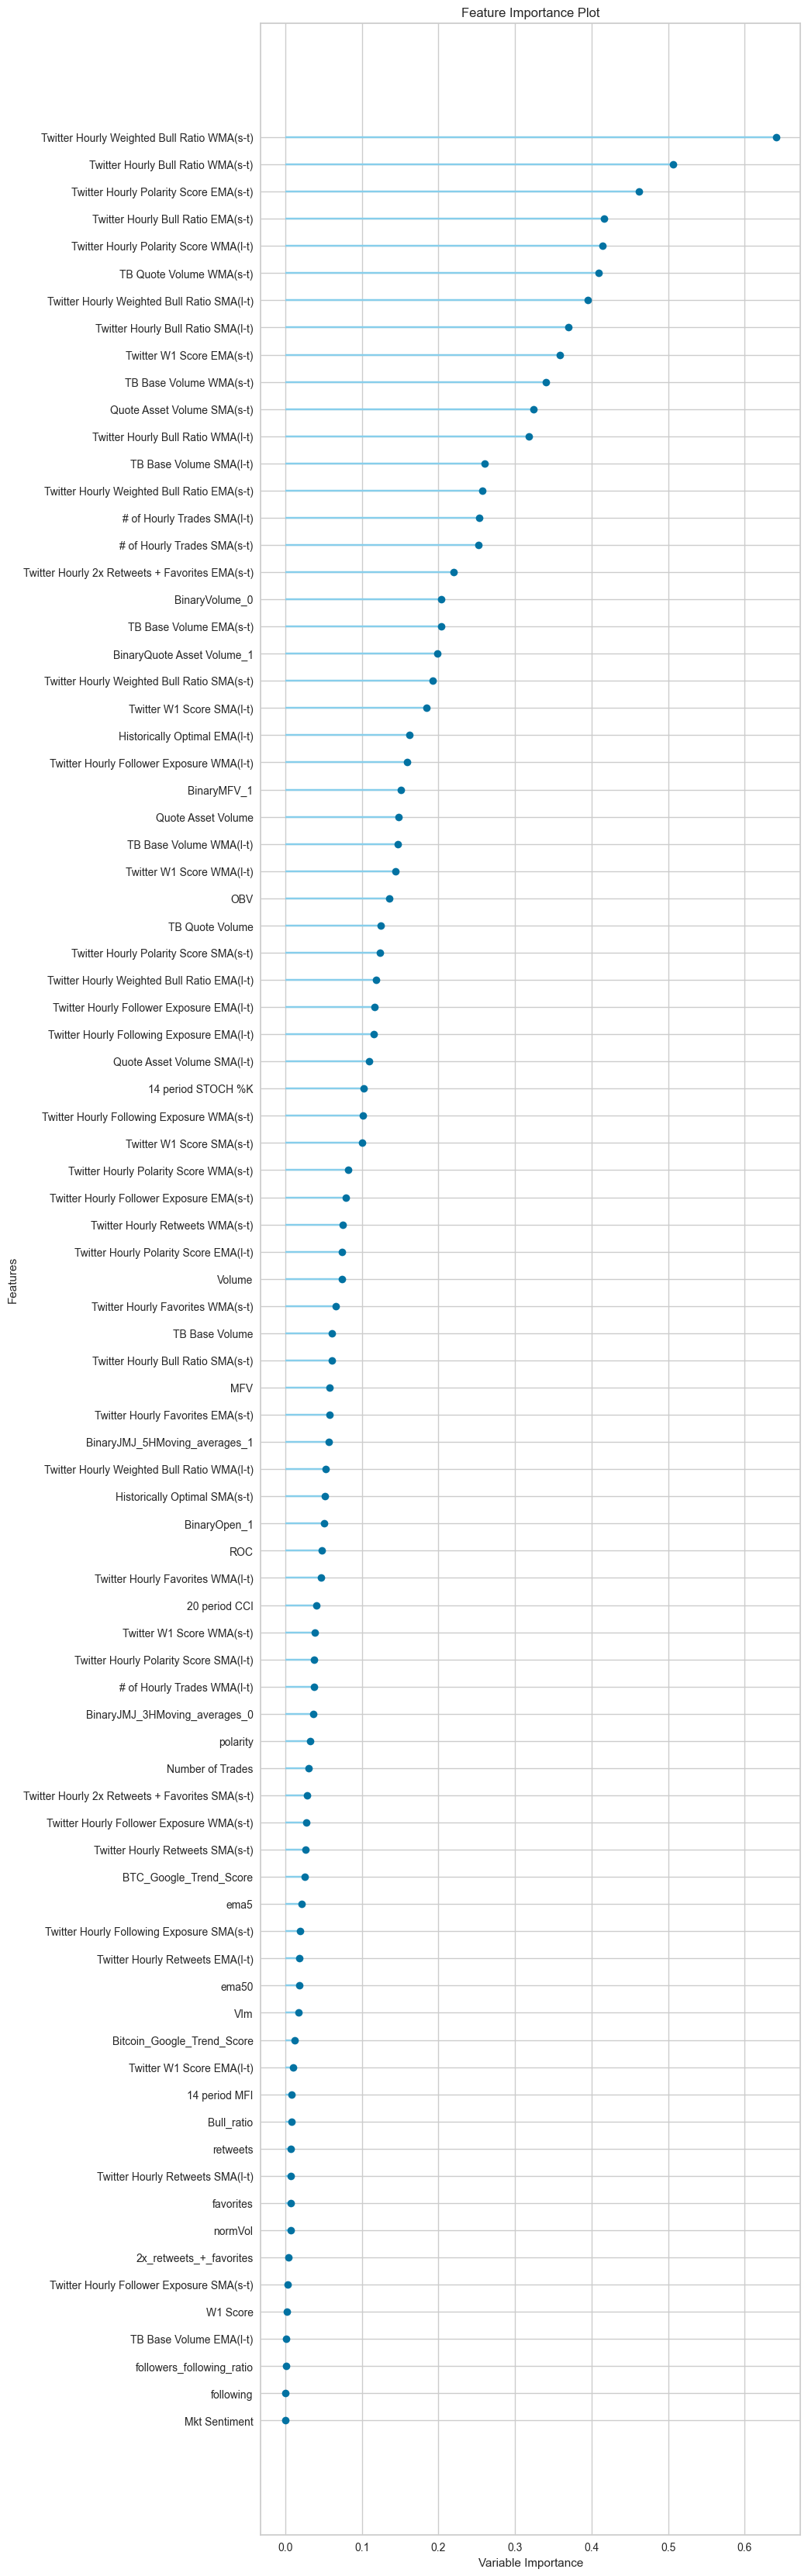

In [63]:
plot_model(rc, plot = 'feature_all')

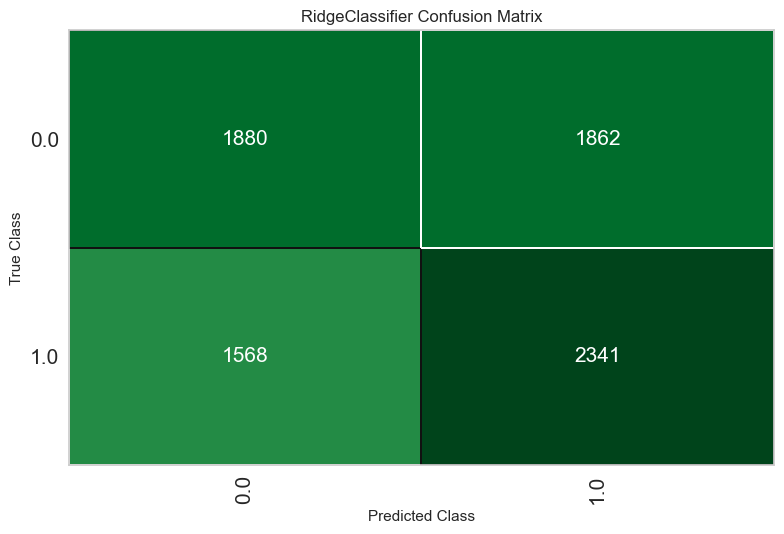

In [64]:
plot_model(rc, plot = 'confusion_matrix')

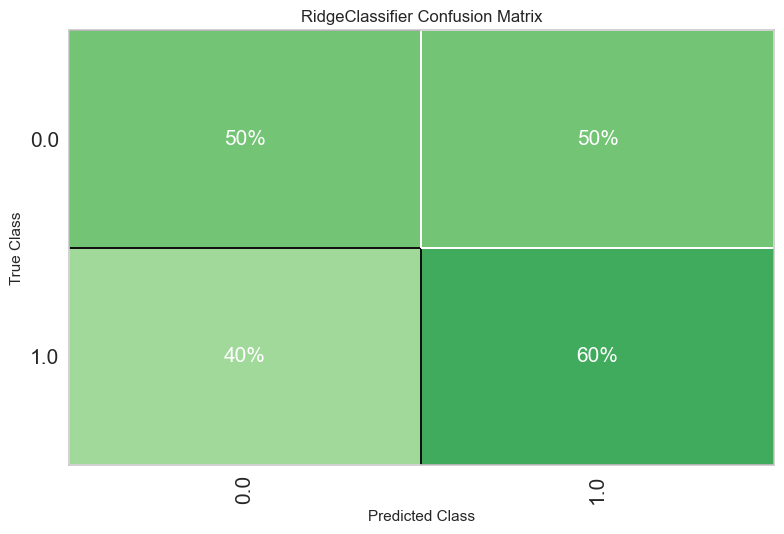

In [65]:
plot_model(rc, plot = 'confusion_matrix',
           plot_kwargs = {'percent' : True})